In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('sample_data/titanic/train.csv')
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# train.describe() 
train.count()
# train.info()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

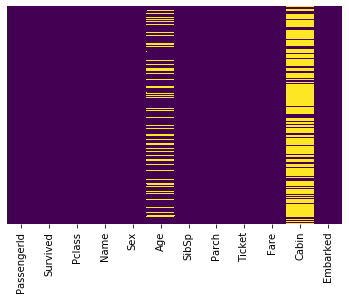

In [21]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

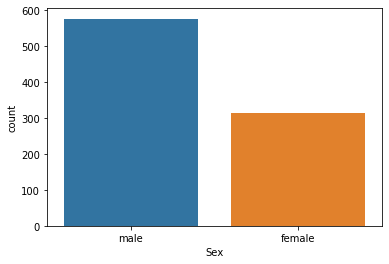

In [22]:
sns.countplot(x='Sex',data=train)

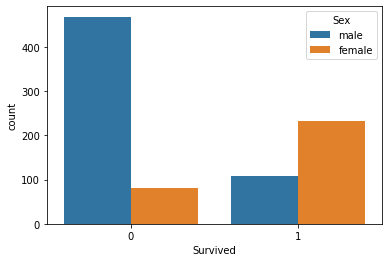

In [4]:
# sns.countplot(x='Survived', hue='Pclass', data=train)
sns.countplot(x='Survived', hue='Sex', data=train)

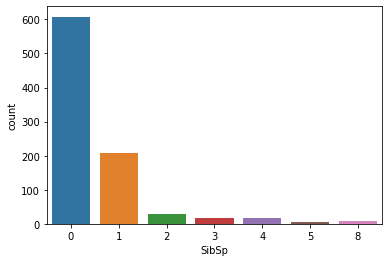

In [10]:
sns.countplot(x='SibSp',data=train)

In [26]:
# x = train['Age'].dropna()

# sns.distplot(x, kde=False, bins=30, color='red')

In [27]:
# sns.distplot(train['Fare'], kde=False, color='Blue')

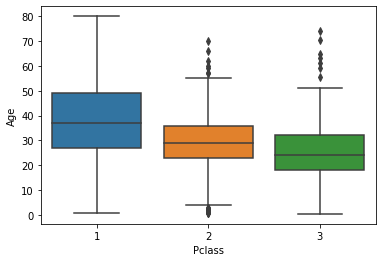

In [28]:
sns.boxplot(y='Age', x='Pclass', data=train)

In [5]:
## Data Cleaning

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

In [7]:
# train.drop(['Cabin'], axis=1, inplace=True)

# train.dropna(inplace=True)
train.count()

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
from sklearn.preprocessing import LabelEncoder


s_e = LabelEncoder()
train['SexN'] = s_e.fit_transform(train['Sex'])




In [9]:

e_e = LabelEncoder()

train['EmbarkedN'] = e_e.fit_transform(train['Embarked'])

In [10]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SexN,EmbarkedN
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,S,1,2
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,S,0,2
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,S,1,2
296,297,0,3,"Hanna, Mr. Mansour",male,23.5,0,0,2693,7.2292,C,1,0
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,S,0,2


In [11]:
x = train[['Pclass','SexN','Fare','EmbarkedN','Parch','Age']]
y = train['Survived']

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [17]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

c:\users\maury\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# prediction
y_pred = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       111
           1       0.74      0.69      0.71        67

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178



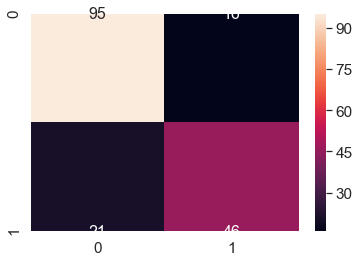

In [29]:
d = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.4)#for label size
sns.heatmap(d, annot=True, annot_kws={"size": 16})

In [30]:
### y = 1/1+e(-x)


Hours = [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]
Pass = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]


In [31]:
df = pd.DataFrame({'Hours':Hours, 'Pass':Pass})


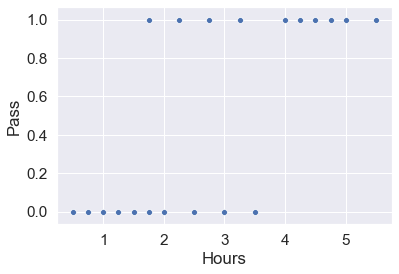

In [32]:
sns.scatterplot(x='Hours',y='Pass', data=df)

In [50]:
# from math import *

In [51]:
# Hours1 = [-x for x in Hours]

In [53]:
# hours = sorted(Hours1 + Hours)

# # hours

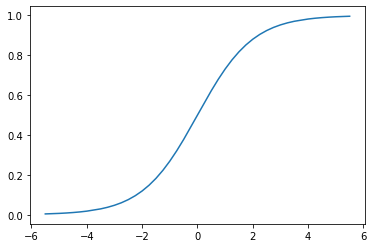

In [54]:
# y = ([(1/(1+exp(-x))) for x in hours])

# # print(y)

# plt.plot(hours,y)